# Sistema Solar Binário

## Descrição do problema a ser analizado

Um sistema binário é um sistema que consiste em duas estrelas orbitando seu centro de massa, como as estrelas representam a maior parte da massa do sistema o resto do sistema também orbita este centro de massa, entretanto, devido a influência gravitacional de cada uma das estrelas, está orbita pode ser diferente em cada caso. O problema consiste em descrever orbitas binárias utilizando o python.


### Classificação

Para o sistema binário a estrela mais brilhante é chamada de estrela primária enquanto a outra é chamada de secundária. Também é possível classificá-las de acordo com a orbita em que chamamos de **binárias amplas** aquelas em que as estrelas ficam separadas pela orbita, de forma que não há troca de massas entre elas, e as **binárias próximas** em que pela proximidade há troca de massa entre as estrelas. Neste estudo descreveremos as orbitas de binárias próximas.

Existem dois tipos de orbitas para um planeta em um sistema binário: A **Tipo-P(Circumbinária)** em que o planeta orbita o centro de massa das duas estrelas, e a **Tipo-S(Não circumbinária)** em que o planeta orbita uma das estrelas e a outra gera perturbações na orbita.

## Formalização matemática do problema

Para descrever o problema é necessário utilizar a gravitação de dois corpos clássica e aplicá-la ao problema das orbitas. Para isto utilizamos a equação da força gravitacional que um corpo $a$ aplica em um corpo $b$:
$$ \vec{F_{ab}}=\frac{-G m_a m_b(\vec{R_b}-\vec{R_a})}{(|\vec{R_b}-\vec{R_a}|)^3}$$

Assim, como, pela 2º lei de Newton, a soma das n forças resultantes sobre um corpo j é igual a

$$\sum_{i\neq j}^{n} \vec{F_{ij}} = m_{j}\vec{a_{j}}$$

então, para o problema de n corpos podemos calcular a aceleração sofrida por cada corpo devido a força gravitacional por

$$\vec{a_{j}} = -G \sum_{i\neq j}^{n}\frac{m_{i} (\vec{R_j}-\vec{R_i})}{(|\vec{R_j}-\vec{R_i}|)^3}$$

Fazemos isso para cada um dos corpos do sistema para
determinar as equacões de movimento do sistema. 

então para:
$$
X=
\begin{bmatrix}
 \vec{R_n} \\ \vec{v_n}
\end{bmatrix}
_{2n\times 1}
$$

temos que:
$$ 
\dot{X}=
\begin{bmatrix}
 \vec{v_n} \\ \dot{\vec{v_n}}
\end{bmatrix}
_{2n\times 1}$$
e
$$
\dot{\vec{v_j}}= \vec{a_j} = -G\sum_{i\neq j}^n m_i \frac{\vec{R_j}-\vec{R_i}}{(|\vec{R_j}-\vec{R_i}|)^3}
$$
Então definindo uma função para $X$ podemos utilizar o metodo de Runge-Kutta de 4ª ordem e assim com as posições e velocidades iniciais
podemos resolver numericamente o problema.

No problema de 3 corpos, para facilitar a escolha das posições e velocidades iniciais, vamos tomar os referenciais partindo do centro de massa das estrelas, a partir disso, podemos definir a massa reduzida por

$$\mu = \frac{M_iM_j}{M_i + M_j}$$

onde $M_i$ e $M_j$ são as massas das estrelas. A partir desta podemos chegar a posição de cada uma das estrelas em relação ao centro de massa fazendo

$$\vec{r_{i}} = \frac{M_{j}}{M{i} + M_{j}} \vec{r}$$
$$\vec{r_{j}} = \frac{M_{i}}{M{i} + M_{j}} \vec{r}$$

onde $\vec{r}$ é a posição das duas estrelas entre si, que é o tamanho do semi-eixo maior da órbita entre as duas estrelas. A partir disso, e do período da órbita $P$, podemos calcular a velocidade tangencial inicial, considerando aproximadamente uma órbita circular fechada

$$\vec{v_{i}} = \frac{2\pi r_{i}}{P}$$

$$\vec{v_{j}} = \frac{2\pi r_{j}}{P}$$

## Implementação do problema em python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from astropy import constants
from astropy import units

from vpython import *

<IPython.core.display.Javascript object>

###  (Sistema Circumbinário Kepler-16)

Valores iniciais:

In [2]:
G = constants.G.value # Constante da Gravitacao
n=3 #Numero de corpos
M=np.zeros(n)
M[0] = (0.6897*units.Msun).decompose().value # Massa da estrela Kepler-16A em Massas Solares
M[1] = (0.20225*units.Msun).decompose().value # Massa da estrela Kepler-16B em Massas Solares
M[2] = (0.333*units.Mjup).decompose().value # Massa do planeta Kepler-16b Massas de Jupiter
mu = (M[0] * M[1])/(M[0] + M[1]) #Massa reduzida das estrelas

Definição da função $\frac{dX}{dt}$:



In [3]:
#Formula Geral (para o problema escrito em 3 dimensões)
def dxdt(X, t):
    n=len(X)//2
    a=np.zeros(n)
    for i in range(n//3):
        for j in range(n//3):
            if i!=j:
                r_ij = X[i*3:3*(1+i)]-X[j*3:3*(1+j)] # Posicao entre os corpos i e j
                mod_rij = np.linalg.norm(r_ij) # Modulo da posicao entre os corpos i e j
                a[3*i:3*(1+i)]+=-G*M[j]*(r_ij)/mod_rij**3 # Aceleracao do corpo i devido ao j
    return np.hstack((X[n:],a))

Utilizando o referencial do centro de massa:

In [4]:
a_S = (0.22431 * units.AU).decompose().value # Distancia inicial entre as estrelas (semi-eixo maior) em Unidade Astronomica
a_P = (0.7048* units.AU).decompose().value # Distancia inicial do planeta (semi-eixo maior) em Unidade Astronomica

P = 2*np.pi*np.sqrt((a_S**3)/(G*(M[0] + M[1]))) # Periodo da orbita das estrelas (entre si) pela terceira lei de kepler
P_p = 2*np.pi*np.sqrt((a_P**3)/(G*(M[0] + M[1]))) # Periodo da orbita do planeta em torno das estrelas pela terceira lei de kepler

#P = (41.079220*units.d).decompose().value # Periodo da orbita das estrelas(entre si) em dias
#P_p = (228.776*units.d).decompose().value # Periodo da orbita do planeta em torno das estrelas em dias

r_1 = -a_S*(mu/M[0]) # Posicao relativa da estrela Kepler-16A
r_2 = a_S*(mu/M[1]) # Posicao relativa da estrela Kepler-16B
r_p = a_P # Posicao do planeta Kepler-16b

v_1 = 2*np.pi*r_1/P # Velocidade inicial da estrela Kepler-16A
v_2 = 2*np.pi*r_2/P # Velocidade inicial da estrela Kepler-16B
v_p = 2*np.pi*r_p/P_p # Velocidade inicial do planeta Kepler-16b

X = np.array([r_1, 0, 0, r_2, 0, 0, r_p, 0, 0, 0, v_1, 0, 0, v_2, 0, 0,
              v_p, 0])

### Aplicações e Resultados

#### Orbita para 1 Período do Planeta

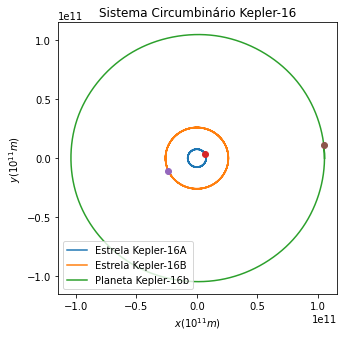

In [5]:
t_orbit = np.linspace(0, P_p, 10000) # Tempo da orbita

trajetoria = odeint(dxdt, X, t_orbit) # Utilizando metodo de integracao numerica

plt.figure(figsize=(5,5))
plt.plot(trajetoria[:, 0], trajetoria[:, 1], label="Estrela Kepler-16A")
plt.plot(trajetoria[:, 3], trajetoria[:, 4], label="Estrela Kepler-16B")
plt.plot(trajetoria[:, 6], trajetoria[:, 7], label="Planeta Kepler-16b")
plt.plot(trajetoria[-1, 0], trajetoria[-1, 1], 'o')
plt.plot(trajetoria[-1, 3], trajetoria[-1, 4], 'o')
plt.plot(trajetoria[-1, 6], trajetoria[-1, 7], 'o')
plt.title("Sistema Circumbinário Kepler-16")
plt.xlabel('$x(10^{11} m)$')
plt.ylabel('$y(10^{11} m)$')
plt.legend(loc="lower left")
plt.show()

#### Orbita da Kepler-16B para 1 Período do Planeta

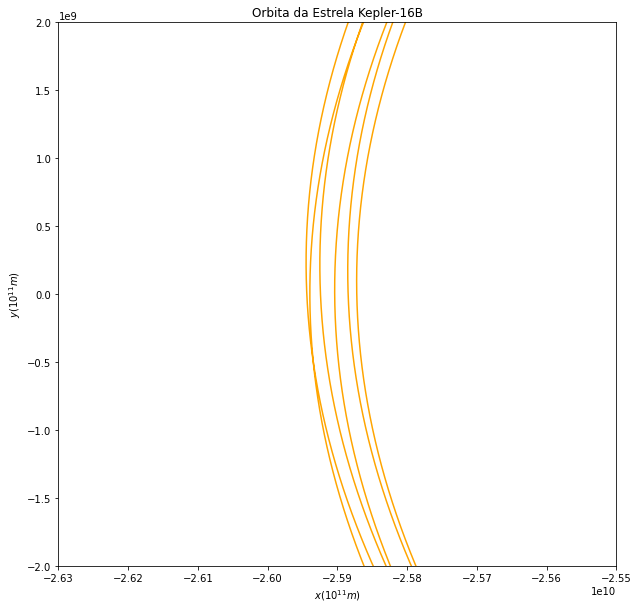

In [213]:
plt.figure(figsize=(10,10))
plt.plot(trajetoria[:, 3], trajetoria[:, 4], color='orange')
plt.plot(trajetoria[-1, 3], trajetoria[-1, 4], 'o')
plt.xlim((-0.263E11, -0.255E11))
plt.ylim((-0.02E11, 0.02E11))
plt.title("Orbita da Estrela Kepler-16B")
plt.xlabel('$x(10^{11} m)$')
plt.ylabel('$y(10^{11} m)$')
plt.show()

Como pode-se observar, ao planeta completar 1 órbita completa, a estrela Kepler-16B, aproximadamente 6 órbitas, e isso pode ser evidenciado quando comparamos o período da órbita do planeta com o das estrelas de forma que

In [214]:
razao_Periodo = P_p/P
print(f'A razão entre o período das estrelas e do planeta é de {razao_Periodo:.4f}')

A razão entre o período das estrelas e do planeta é de 5.5696


## Sistema Circumbinário - Orbita eliptica

Alterando a distância inicial do planeta vemos que a sua órbita se modifica, quando ela é entre 0.42-0.7 U.A temos uma órbita aproximadamente circular, com próximo a 0.42 ela começando a se tornar caótica, como mostra a simulação abaixo

In [207]:
a_P = (0.42 * units.AU).decompose().value # Distancia inicial do planeta (semi-eixo maior) em Unidade Astronomica
P_p = 2*np.pi*np.sqrt((a_P**3)/(G*(M[0] + M[1]))) # Periodo da orbita do planeta em torno das estrelas pela terceira lei de kepler
r_p = a_P # Posicao do planeta Kepler-16b
v_p = 2*np.pi*r_p/P_p # Velocidade inicial do planeta Kepler-16b
X = np.array([r_1, 0, 0, r_2, 0, 0, r_p, 0, 0, 0, v_1, 0, 0, v_2, 0, 0,
              v_p, 0])


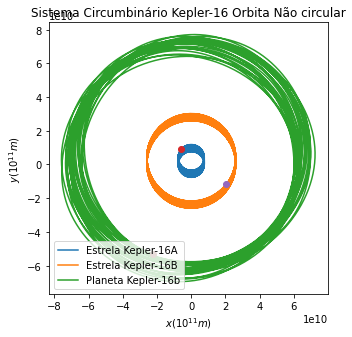

In [208]:
t_orbit = np.linspace(0, 30*P_p, 10000) # Tempo da orbita

trajetoria = odeint(dxdt, X, t_orbit) # Utilizando metodo de integracao numerica

plt.figure(figsize=(5,5))
plt.plot(trajetoria[:, 0], trajetoria[:, 1], label="Estrela Kepler-16A")
plt.plot(trajetoria[:, 3], trajetoria[:, 4], label="Estrela Kepler-16B")
plt.plot(trajetoria[:, 6], trajetoria[:, 7], label="Planeta Kepler-16b")
plt.plot(trajetoria[-1, 0], trajetoria[-1, 1], 'o')
plt.plot(trajetoria[-1, 3], trajetoria[-1, 4], 'o')
plt.plot(trajetoria[-1, 6], trajetoria[-1, 7], 'o')
plt.title("Sistema Circumbinário Kepler-16 Orbita Não circular")
plt.xlabel('$x(10^{11} m)$')
plt.ylabel('$y(10^{11} m)$')
plt.legend(loc="lower left")
plt.show()

## Sistema Não Circumbinário - Órbita Caótica (Escape)

A partir de 0.41 U.A temos uma órbita caótica

In [339]:
a_P = (0.41* units.AU).decompose().value # Distancia inicial do planeta (semi-eixo maior) em Unidade Astronomica
P_p = 2*np.pi*np.sqrt((a_P**3)/(G*(M[0] + M[1]))) # Periodo da orbita do planeta em torno das estrelas pela terceira lei de kepler
r_p = a_P # Posicao do planeta Kepler-16b
v_p = 2*np.pi*r_p/P_p # Velocidade inicial do planeta Kepler-16b
X = np.array([r_1, 0, 0, r_2, 0, 0, r_p, 0, 0, 0, v_1, 0, 0, v_2, 0, 0,
              v_p, 0])

In [342]:
t_orbit = np.linspace(0, 4*P_p, 1000) # Tempo da orbita

trajetoria = odeint(dxdt, X, t_orbit) # Utilizando metodo de integracao numerica

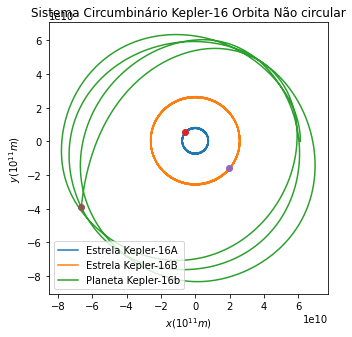

In [343]:
plt.figure(figsize=(5,5))
plt.plot(trajetoria[:, 0], trajetoria[:, 1], label="Estrela Kepler-16A")
plt.plot(trajetoria[:, 3], trajetoria[:, 4], label="Estrela Kepler-16B")
plt.plot(trajetoria[:, 6], trajetoria[:, 7], label="Planeta Kepler-16b")
plt.plot(trajetoria[-1, 0], trajetoria[-1, 1], 'o')
plt.plot(trajetoria[-1, 3], trajetoria[-1, 4], 'o')
plt.plot(trajetoria[-1, 6], trajetoria[-1, 7], 'o')
plt.title("Sistema Não Circumbinário Kepler-16 Orbita Caótica")
plt.xlabel('$x(10^{11} m)$')
plt.ylabel('$y(10^{11} m)$')
plt.legend(loc="lower left")
plt.show()

Onde para períodos de tempo muito longos levará o planeta ser lançado para fora da órbita

In [344]:
t_orbit = np.linspace(0, 30*P_p, 1000) # Tempo da orbita

trajetoria = odeint(dxdt, X, t_orbit) # Utilizando metodo de integracao numerica

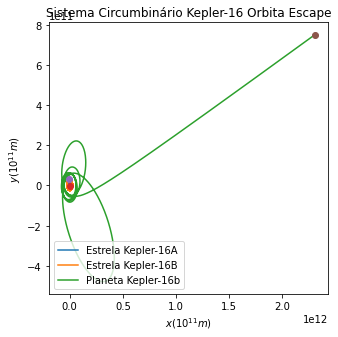

In [346]:
plt.figure(figsize=(5,5))
plt.plot(trajetoria[:, 0], trajetoria[:, 1], label="Estrela Kepler-16A")
plt.plot(trajetoria[:, 3], trajetoria[:, 4], label="Estrela Kepler-16B")
plt.plot(trajetoria[:, 6], trajetoria[:, 7], label="Planeta Kepler-16b")
plt.plot(trajetoria[-1, 0], trajetoria[-1, 1], 'o')
plt.plot(trajetoria[-1, 3], trajetoria[-1, 4], 'o')
plt.plot(trajetoria[-1, 6], trajetoria[-1, 7], 'o')
plt.title("Sistema Não Circumbinário Kepler-16 Orbita Escape")
plt.xlabel('$x(10^{11} m)$')
plt.ylabel('$y(10^{11} m)$')
plt.legend(loc="lower left")
plt.show()

## Sistema Não Circumbinário - Tipo S

A partir de 0.24 U.A temos as órbitas do Tipo S, onde o planeta realiza uma órbita aproximadamente circular em torno da estrela Kepler-16B, onde para órbitas de 0.19 U.A podemos observar bem este tipo de órbita

In [438]:
a_P = (0.19* units.AU).decompose().value # Distancia inicial do planeta (semi-eixo maior) em Unidade Astronomica
P_p = 2*np.pi*np.sqrt((a_P**3)/(G*(M[0] + M[1]))) # Periodo da orbita do planeta em torno das estrelas pela terceira lei de kepler
r_p = a_P # Posicao do planeta Kepler-16b
v_p = 2*np.pi*r_p/P_p # Velocidade inicial do planeta Kepler-16b
X = np.array([r_1, 0, 0, r_2, 0, 0, r_p, 0, 0, 0, v_1, 0, 0, v_2, 0, 0,
              v_p, 0])

In [439]:
t_orbit = np.linspace(0, 7*P_p, 10000) # Tempo da orbita

trajetoria = odeint(dxdt, X, t_orbit) # Utilizando metodo de integracao numerica

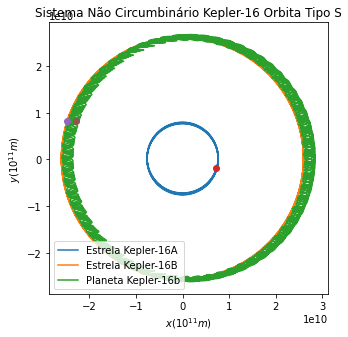

In [440]:
plt.figure(figsize=(5,5))
plt.plot(trajetoria[:, 0], trajetoria[:, 1], label="Estrela Kepler-16A")
plt.plot(trajetoria[:, 3], trajetoria[:, 4], label="Estrela Kepler-16B")
plt.plot(trajetoria[:, 6], trajetoria[:, 7], label="Planeta Kepler-16b")
plt.plot(trajetoria[-1, 0], trajetoria[-1, 1], 'o')
plt.plot(trajetoria[-1, 3], trajetoria[-1, 4], 'o')
plt.plot(trajetoria[-1, 6], trajetoria[-1, 7], 'o')
plt.title("Sistema Não Circumbinário Kepler-16 Orbita Tipo S")
plt.xlabel('$x(10^{11} m)$')
plt.ylabel('$y(10^{11} m)$')
plt.legend(loc="lower left")
plt.show()

A partir de 0.12 U.A, onde o planeta já está em uma região interna a órbita da estrela Kepler-16B, teremos o começo de um órbita caótica

In [565]:
a_P = (0.12* units.AU).decompose().value # Distancia inicial do planeta (semi-eixo maior) em Unidade Astronomica
P_p = 2*np.pi*np.sqrt((a_P**3)/(G*(M[0] + M[1]))) # Periodo da orbita do planeta em torno das estrelas pela terceira lei de kepler
r_p = a_P # Posicao do planeta Kepler-16b
v_p = 2*np.pi*r_p/P_p # Velocidade inicial do planeta Kepler-16b
X = np.array([r_1, 0, 0, r_2, 0, 0, r_p, 0, 0, 0, v_1, 0, 0, v_2, 0, 0,
              v_p, 0])

In [566]:
t_orbit = np.linspace(0, 30*P_p, 10000) # Tempo da orbita

trajetoria = odeint(dxdt, X, t_orbit) # Utilizando metodo de integracao numerica

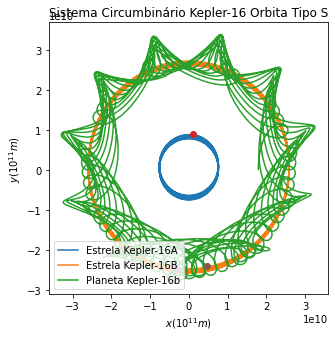

In [567]:
plt.figure(figsize=(5,5))
plt.plot(trajetoria[:, 0], trajetoria[:, 1], label="Estrela Kepler-16A")
plt.plot(trajetoria[:, 3], trajetoria[:, 4], label="Estrela Kepler-16B")
plt.plot(trajetoria[:, 6], trajetoria[:, 7], label="Planeta Kepler-16b")
plt.plot(trajetoria[-1, 0], trajetoria[-1, 1], 'o')
plt.plot(trajetoria[-1, 3], trajetoria[-1, 4], 'o')
plt.plot(trajetoria[-1, 6], trajetoria[-1, 7], 'o')
plt.title("Sistema Circumbinário Kepler-16 Orbita Tipo S")
plt.xlabel('$x(10^{11} m)$')
plt.ylabel('$y(10^{11} m)$')
plt.legend(loc="lower left")
plt.show()

Já a partir de 0.065 U.A temos uma órbita que lança o planeta para fora do sistema

In [609]:
a_P = (0.065* units.AU).decompose().value # Distancia inicial do planeta (semi-eixo maior) em Unidade Astronomica
P_p = 2*np.pi*np.sqrt((a_P**3)/(G*(M[0] + M[1]))) # Periodo da orbita do planeta em torno das estrelas pela terceira lei de kepler
r_p = a_P # Posicao do planeta Kepler-16b
v_p = 2*np.pi*r_p/P_p # Velocidade inicial do planeta Kepler-16b
X = np.array([r_1, 0, 0, r_2, 0, 0, r_p, 0, 0, 0, v_1, 0, 0, v_2, 0, 0,
              v_p, 0])

In [610]:
t_orbit = np.linspace(0, 10*P_p, 10000) # Tempo da orbita

trajetoria = odeint(dxdt, X, t_orbit) # Utilizando metodo de integracao numerica

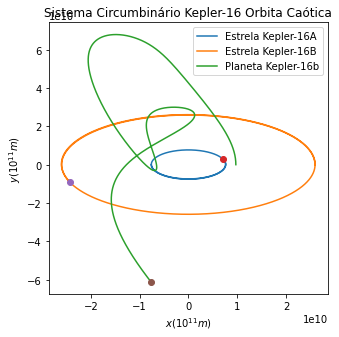

In [612]:
plt.figure(figsize=(5,5))
plt.plot(trajetoria[:, 0], trajetoria[:, 1], label="Estrela Kepler-16A")
plt.plot(trajetoria[:, 3], trajetoria[:, 4], label="Estrela Kepler-16B")
plt.plot(trajetoria[:, 6], trajetoria[:, 7], label="Planeta Kepler-16b")
plt.plot(trajetoria[-1, 0], trajetoria[-1, 1], 'o')
plt.plot(trajetoria[-1, 3], trajetoria[-1, 4], 'o')
plt.plot(trajetoria[-1, 6], trajetoria[-1, 7], 'o')
plt.title("Sistema Circumbinário Kepler-16 Orbita Caótica")
plt.xlabel('$x(10^{11} m)$')
plt.ylabel('$y(10^{11} m)$')
plt.legend(loc="upper right")
plt.show()

E é a partir de -0.03, com o planeta dentro da órbita da estrela Kepler-16A, podemos observar uma órbita do Tipo-S, agora ao redor da estrela Kepler-16A

In [681]:
a_P = (0.03* units.AU).decompose().value # Distancia inicial do planeta (semi-eixo maior) em Unidade Astronomica
P_p = 2*np.pi*np.sqrt((a_P**3)/(G*(M[0] + M[1]))) # Periodo da orbita do planeta em torno das estrelas pela terceira lei de kepler
r_p = -a_P # Posicao do planeta Kepler-16b
v_p = 2*np.pi*r_p/P_p # Velocidade inicial do planeta Kepler-16b
X = np.array([r_1, 0, 0, r_2, 0, 0, r_p, 0, 0, 0, v_1, 0, 0, v_2, 0, 0,
              v_p, 0])

In [684]:
t_orbit = np.linspace(0, 20*P_p, 10000) # Tempo da orbita

trajetoria = odeint(dxdt, X, t_orbit) # Utilizando metodo de integracao numerica

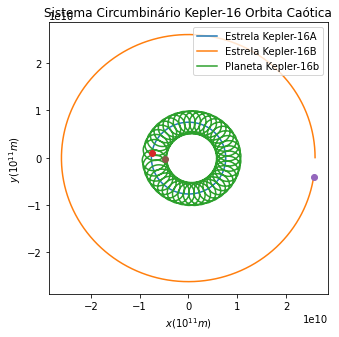

In [685]:
plt.figure(figsize=(5,5))
plt.plot(trajetoria[:, 0], trajetoria[:, 1], label="Estrela Kepler-16A")
plt.plot(trajetoria[:, 3], trajetoria[:, 4], label="Estrela Kepler-16B")
plt.plot(trajetoria[:, 6], trajetoria[:, 7], label="Planeta Kepler-16b")
plt.plot(trajetoria[-1, 0], trajetoria[-1, 1], 'o')
plt.plot(trajetoria[-1, 3], trajetoria[-1, 4], 'o')
plt.plot(trajetoria[-1, 6], trajetoria[-1, 7], 'o')
plt.title("Sistema Circumbinário Kepler-16 Orbita Caótica")
plt.xlabel('$x(10^{11} m)$')
plt.ylabel('$y(10^{11} m)$')
plt.legend(loc="upper right")
plt.show()

Como a estrela Kepler-16A possui maior massa que a Kepler-16b, podemos observar que a órbita do tipo S será mais estável

### Simulação no vpython

In [6]:
star1 = sphere(pos=vector(r_1, 0, 0), radius=(0.6897*units.R_sun).decompose().value, color=color.yellow, make_trail=True)
star2 = sphere(pos=vector(r_2, 0, 0), radius=(0.22623*units.R_sun).decompose().value, color=color.cyan, make_trail=True)
planet = sphere(pos=vector(r_p, 0, 0),
                        radius=(0.7538*units.R_jupiter).decompose().value,
                        color=color.red, make_trail=True)

# Vetor aceleracao que aponta do planeta a estrela Kepler-16A
star1_planet_component = (X[0:3] - X[6:9]) # Componentes do vetor posicao
mod_star1_planet_component = np.linalg.norm(star1_planet_component) # Modulo do vetor posicao
star1_acc = G*M[0]*(star1_planet_component)/mod_star1_planet_component**3 # Vetor aceleracao
planet.vecstar1 = vec(star1_acc[0]*1E+10, star1_acc[1]*1E+10, star1_acc[2]*1E+10) # Criando vetor
attach_arrow(planet, "vecstar1", color=color.yellow, shaftwidth=0.8*1E+8) # Anexando vetor

# Vetor acaeleracao que aponta do planeta a estrela Kepler-16B
star2_planet_component = (X[3:6] - X[6:9]) # Componentes do vetor
mod_star2_planet_component = np.linalg.norm(star2_planet_component) # Modulo do vetor posicao
star2_acc = G*M[1]*(star2_planet_component)/mod_star2_planet_component**3 # Vetor aceleracao
planet.vecstar2 = vec(star2_acc[0]*1E+10, star2_acc[1]*1E+10, star2_acc[2]*1E+10) # Criando vetor
attach_arrow(planet, "vecstar2", color=color.cyan, shaftwidth=0.8*1E+8) # Anexando vetor


# Vetor que aponta do planeta a direcao do vetor da forca resultante
radial_component = star1_acc + star2_acc # Componentes do vetor
planet.rad = vec(radial_component[0]*1E+10, radial_component[1]*1E+10, radial_component[2]*1E+10) # Criando vetor
attach_arrow(planet, "rad", color=color.blue, shaftwidth=0.8*1E+8) # Anexando vetor

for ponto in trajetoria:
    rate(100)
    
    # Posicao dos corpos
    star1.pos = vector(ponto[0], ponto[1], ponto[2])
    star2.pos = vector(ponto[3], ponto[4], ponto[5])
    planet.pos = vector(ponto[6], ponto[7], ponto[8])
    
    # Componentes dos vetores posicao
    star1_planet_component = (star1.pos - planet.pos)
    star2_planet_component = (star2.pos - planet.pos)
    
    # Modulos dos vetores posicao
    mod_star1_planet_component = star1_planet_component.mag
    mod_star2_planet_component = star2_planet_component.mag
    
    # Vetor aceleracao
    star1_acc = G*M[0]*(star1_planet_component)/mod_star1_planet_component**3 # Vetor aceleracao
    star2_acc = G*M[1]*(star2_planet_component)/mod_star2_planet_component**3 # Vetor aceleracao
    radial = (star1_acc + star2_acc)

    # Vetores
    planet.vecstar1 = vec(star1_acc*1E+13)
    planet.vecstar2 = vec(star2_acc*1E+13)
    planet.rad = vec(radial*1E+13)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
r_1

-7608903354.101703

In [11]:
r_2

25947395022.6153

In [12]:
r_p

119678296560.0

In [17]:
np.sqrt(abs(2*G*(r_1*M[1] + r_2*M[0])/(r_1*r_2)))

148291.0567973696

In [18]:
v_1 = 2*np.pi*r_1/P

In [20]:
v_p

31449.83508139314